<a href="https://colab.research.google.com/github/sumeet21428/Convex-Optimization/blob/main/COO_Assessment2_2021428.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assessment 2 - Sumeet Mehra (2021428)

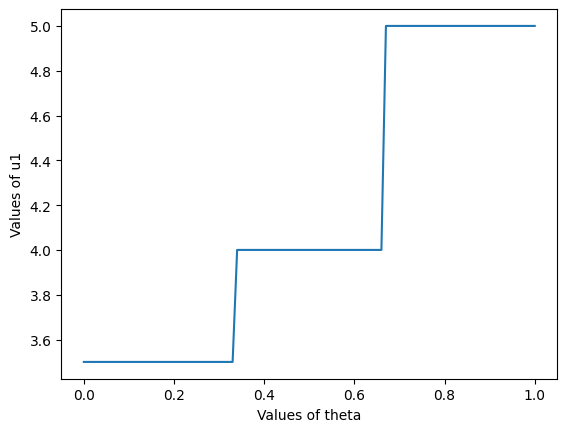

In [ ]:
# Problem 1
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

#Defining the vairables
u = cp.Variable(2)
temp = u[0]
#Defining theta, the parameter in the equation
theta = cp.Parameter()
#Defining the disagreement point
d = np.array([3.5, 2])
d1 = [3.5, 2]
#Objective function
f = theta * u[0] + (1-theta) * u[1]
obj_fn = cp.Maximize(f)

#constraints for the given problem
constraints = [u[0] + 2*u[1] <= 12,
    2*u[0] + u[1] <= 12,
    u[0] >= 3.5,
    u[1] >= 2, theta >= 0]

problem = cp.Problem(obj_fn, constraints)

#Now we need to find all values of u1 for differnet values of theta from 0 to 1.
theta_val = np.linspace(0,1,101)
u1_val = [] #storing the results in a list
x = 0
while x<len(theta_val):
  theta.value = theta_val[x]
  problem = cp.Problem(obj_fn, constraints)
  problem.solve()
  u1_val.append(u[0].value)
  x = x+1

#plotting the requierd values
plt.plot(theta_val, u1_val)
plt.xlabel("Values of theta")
plt.ylabel("Values of u1")
plt.show()




Value of u1: 4.2499999905148425
Value of u2: 3.5000000084176017
Primal optimal value: 0.11778302862124113
Optimal dual variables:
1.870659768095813e-09
0.6666666661226787
1.6181317463280677e-09
7.876114850243983e-10
The x axis repesents the Disagreement payoff of player 1 and the y axis represents payoff of both the players


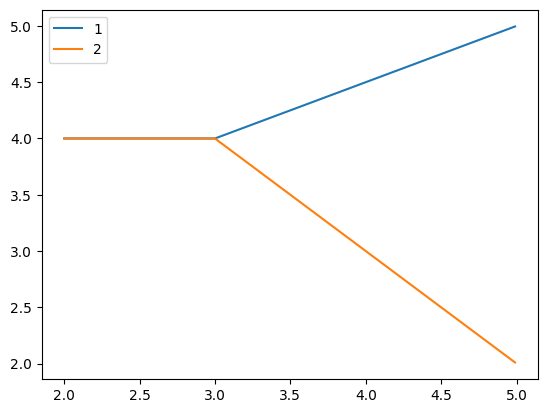

In [ ]:
#Problem 2
import cvxpy as cp
import numpy as np
#Disagreement point 
d = np.array([3.5,2])
#Variable u
u = cp.Variable(2)
# Parameter theta
theta = cp.Parameter()
theta.value = 0.5
#constraints for the given problem
constraints = [u[0] + 2*u[1] <= 12,
    2*u[0] + u[1] <= 12,
    u[0] >= 3.5,
    u[1] >= 2, theta >= 0]

#Defining the Nash Welfare Function
N = cp.log(u[0]-d[0]) + cp.log(u[1]-d[1])
obj_fn = cp.Maximize(N)

#finding the solution
problem = cp.Problem(obj_fn, constraints)
problem.solve()
print(f'Value of u1: {u[0].value}')
print(f'Value of u2: {u[1].value}')


#Problem 2(a)
print(f'Primal optimal value: {problem.value}') #primal optimal value is the optimal objective value of the problem
# finding the optimal dual variables, which can be obtained using "constraints.dual_variables" in cvxpy
print("Optimal dual variables:")
for i in range(4):
  print(problem.constraints[i].dual_value)

#Problem 2(b)

#Defining the disagreement points
d1_array = np.linspace(2, 5, 100)
d2 = 2

#for storing all values of u1 and u2
player1_arr = []
player2_arr = []

for i in d1:
  x = 0

  u = cp.Variable(2)

  theta = cp.Parameter(nonneg = True)
  theta.value = 0.5

  #Objective function
  f = cp.log(u[0]-i) + cp.log(u[1]-d2)
  obj_fn = cp.Maximize(f)


  
  #constraints for the given problem

  c1 = u[0] + 2*u[1] <= 12
  c2 = 2*u[0] + u[1] <= 12
  c3 = u[0] - i >= 0
  c4 = u[1] - 2 >= 0

  constraints = [c1,c2,c3,c4]

  cp.Problem(obj_fn, constraints).solve()

  player1_arr.append(u[0].value)
  i+=1
  player2_arr.append(u[1].value)
  i-=1

#plotting the vals
plt.plot(d1, player1_arr, d1, player2_arr)
print("The x axis repesents the Disagreement payoff of player 1 and the y axis represents payoff of both the players")
plt.legend(['1', '2'])
plt.show()

In [ ]:
#Problem 3


u = np.array([2, 2])
#Disagreement points
d = np.array([2,1])

#Defining the constraints functions
c1 = u[0] + 2*u[1] - 12
c2 = 2*u[0] + u[1] - 12
c3 = u[0] - d[0]
c4 = u[1] - d[1]



initial_t = ([2,3])
final_t = 0

objective_fn = -(2*initial_t[0]**2 + 2*initial_t[1]**2 - 4*initial_t[0] - 6*initial_t[1] + 8) #weighted sum of the two payoffs u[0] and u[1], with the weights determined by the parameter theta
gradient = np.array([-4*initial_t[0] + 4, -6*initial_t[1] + 6]) #representing the partial derivatives of the objective function with respect to each of the payoffs

#Defining the objective function
#obj_fn = -np.sum(np.log(-np.array([c1, c2, c3, c4])) / initial_t)

#Nash bargaining solution
theta= 0.5
N = theta*u[0] + (1-theta)*u[1]

#inequality constraint function values at the optimum
g = np.array([c1,c2,c3,c4])


print(f'Initial point is: {initial_t}')
print(f'Final point is: {final_t}')
print(f'Nash Bargaining solution: {N}')
print(f'inequality constraint function values at the optimum: {g}')

Initial point is: [2, 3]
Final point is: 0
Nash Bargaining solution: 2.0
inequality constraint function values at the optimum: [-6 -6  0  1]


Sources referred to : https://www.cvxpy.org/